## BHARAT INTERN: MACHINE LEARNING INTERNSHIP

## TASK 2: WINE QUALITY PREDICTION

## BY SWATI LENKA

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

In [71]:
wine=pd.read_csv("winequality.zip")
print("Successfully Imported")  
wine.head()

Successfully Imported


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [72]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [73]:
wine.shape

(6497, 13)

In [74]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [75]:
for col in wine.columns:
    if wine[col].isnull().sum() > 0:
        wine[col] = wine[col].fillna(wine[col].mean())
        
wine.isnull().sum().sum()

0

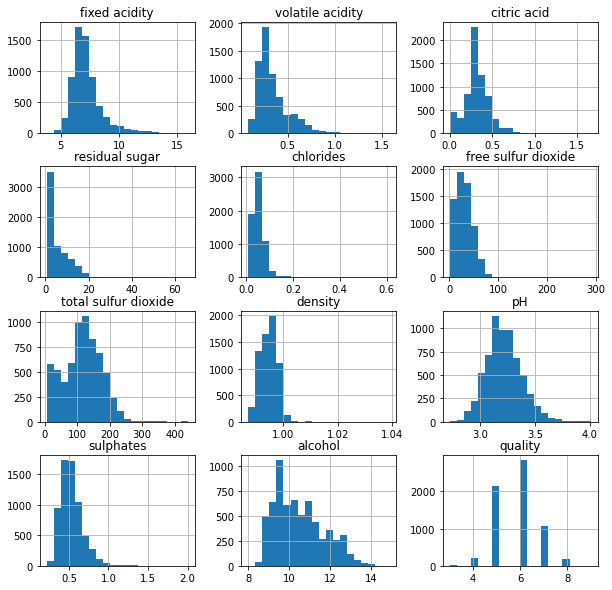

In [76]:
wine.hist(bins=20, figsize=(10, 10))
plt.show()

In [77]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


In [78]:
wine.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060139,20.636574,103.432870,0.994833,3.231620,0.505006,10.180093
5,7.329085,0.389721,0.307726,5.804116,0.064666,30.237371,120.839102,0.995849,3.212051,0.526418,9.837783
6,7.178091,0.313767,0.323783,5.551144,0.054169,31.165021,115.410790,0.994558,3.217702,0.532466,10.587553
7,7.128962,0.288989,0.334764,4.734610,0.045272,30.422150,108.498610,0.993126,3.227773,0.547025,11.386006
8,6.840500,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


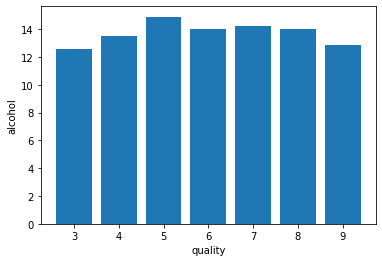

In [80]:
plt.bar(wine['quality'], wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<AxesSubplot:>

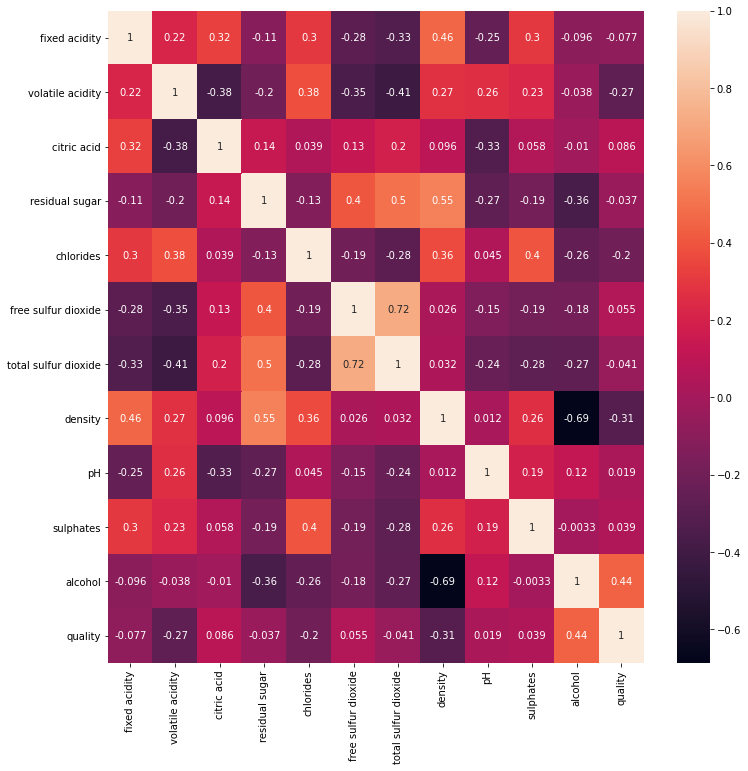

In [81]:
plt.figure(figsize=(12,12))
corr = wine.corr()
sns.heatmap(corr,annot=True)

In [82]:
wine.replace({'white': 1, 'red': 0}, inplace=True)

In [83]:
wine = wine.drop('total sulfur dioxide', axis=1)

In [84]:
wine['best quality'] = [1 if x > 5 else 0 for x in wine.quality]

In [85]:
features = wine.drop(['quality', 'best quality'], axis=1)
target = wine['best quality']
 
Xtrain, Xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40)
 
Xtrain.shape, Xtest.shape

((5197, 11), (1300, 11))

Normalising

In [99]:
from sklearn .preprocessing import MinMaxScaler
norm = MinMaxScaler()
Xtrain = norm.fit_transform(Xtrain)
Xtest = norm.transform(Xtest)

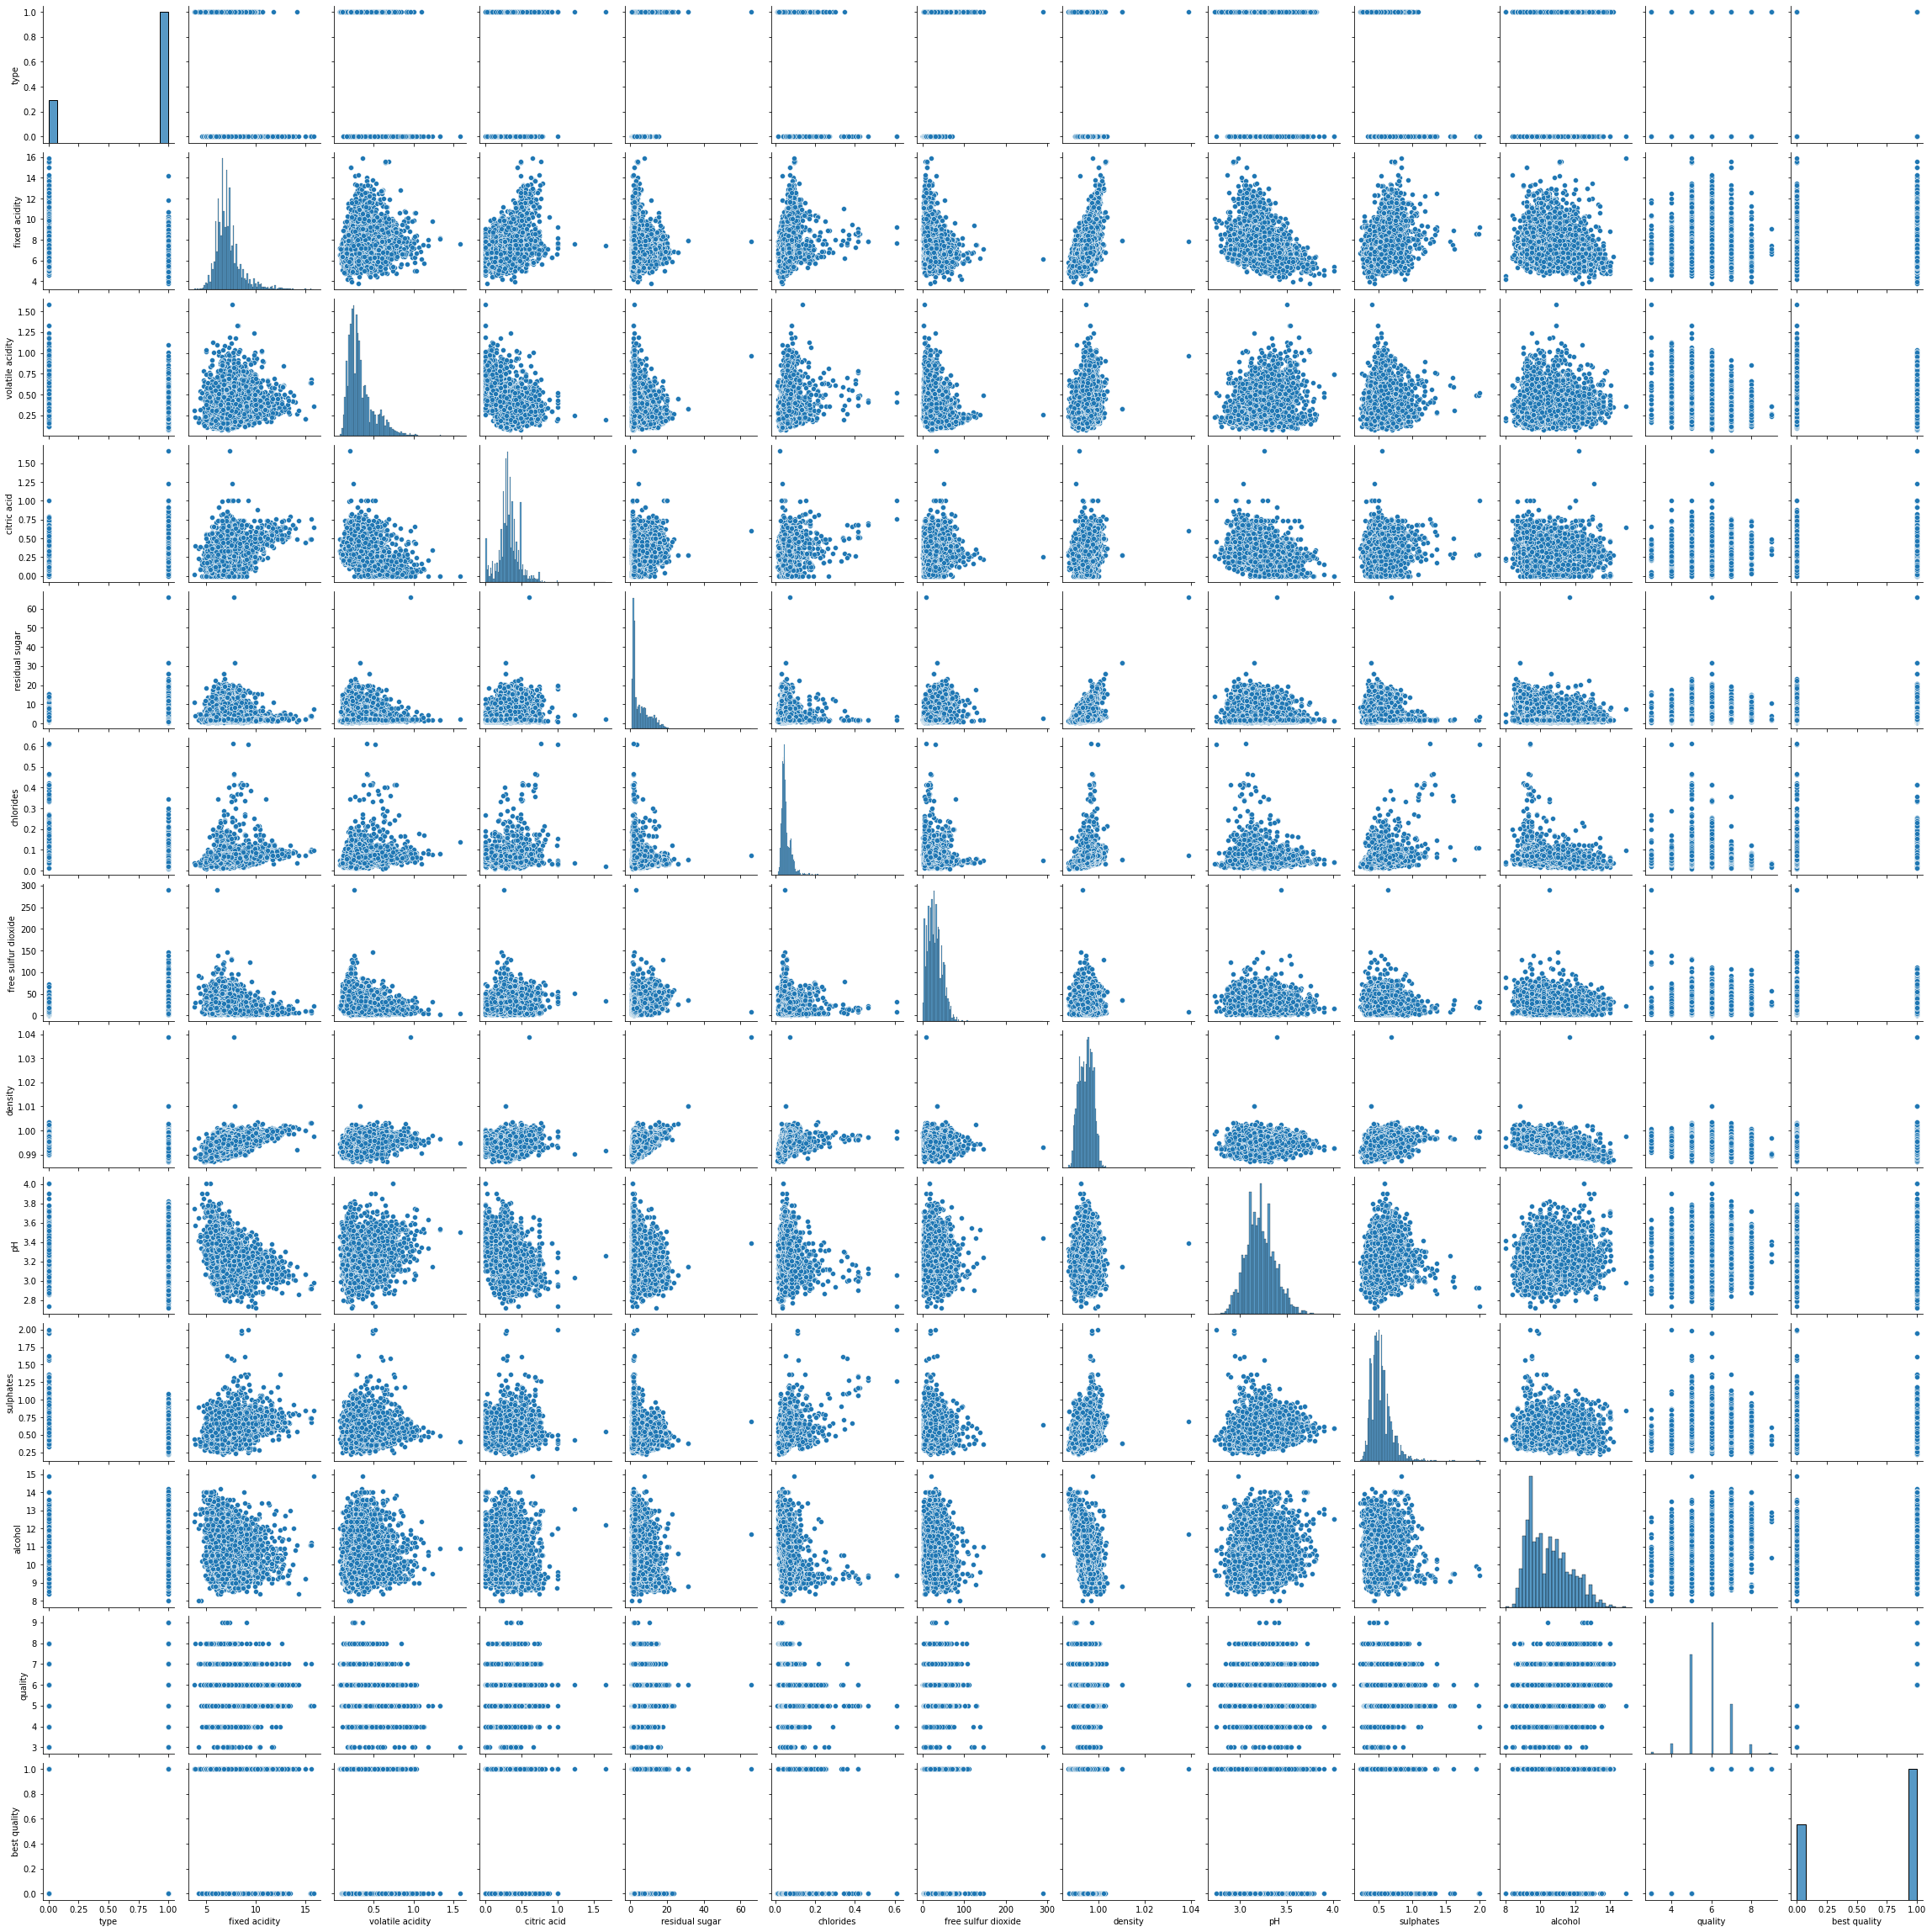

In [86]:
sns.pairplot(wine)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

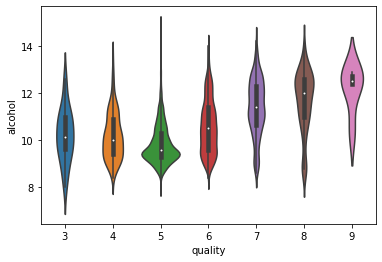

In [87]:
sns.violinplot(x='quality' , y='alcohol', data=wine)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


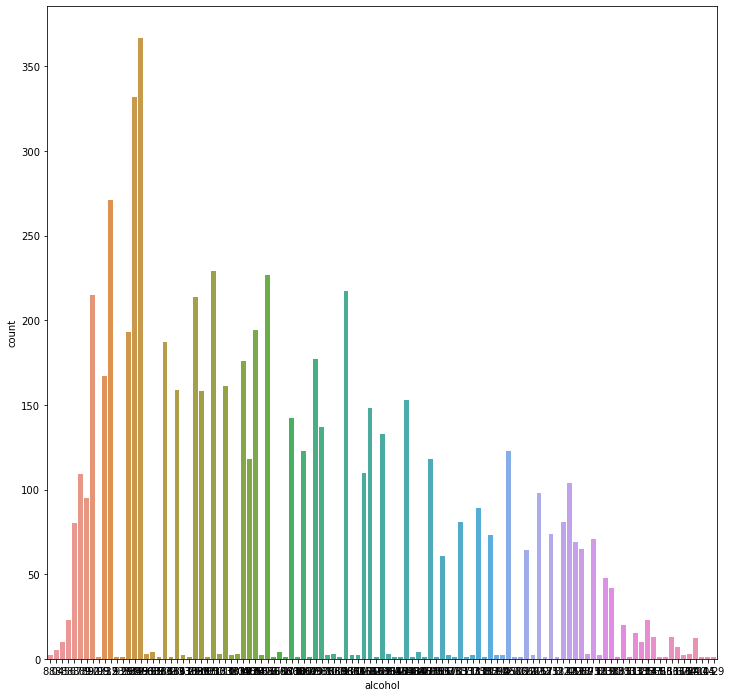

In [88]:
plt.figure(figsize=(12,12))
sns.countplot(wine['alcohol'])
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


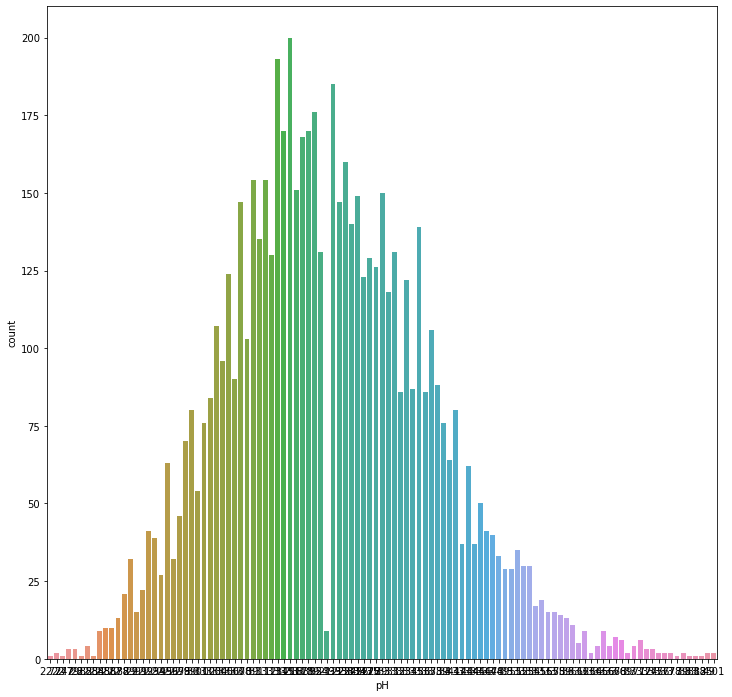

In [89]:
plt.figure(figsize=(12,12))
sns.countplot(wine['pH'])
plt.show()

In [90]:
wine["good_quality"]=[1 if x>=6 else 0 for x in wine["quality"]]

In [91]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality,good_quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8,6,1,1
1,1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5,6,1,1
2,1,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1,6,1,1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1,1
4,1,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5,5,0,0
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2,6,1,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0,6,1,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2,5,0,0


In [92]:
X = wine.drop(['quality','good_quality'], axis = 1)
y = wine['good_quality']

# TRAIN TEST SPLIT

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LOGISTIC REGRESSION

In [116]:
models = LogisticRegression()
models.fit(Xtrain, ytrain)
print(f'{models} : ')
print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models.predict(Xtrain)))
print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models.predict(Xtest)))
print()

LogisticRegression() : 
Training Accuracy :  0.7019709565048414
Validation Accuracy :  0.6937888865050418



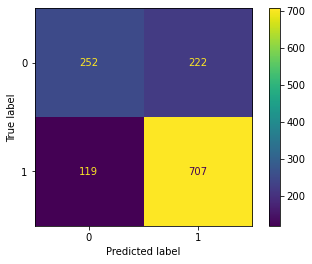

In [117]:
metrics.plot_confusion_matrix(models, Xtest, ytest)
plt.show()

In [110]:
print(metrics.classification_report(ytest,
                                    models.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.68      0.53      0.60       474
           1       0.76      0.86      0.81       826

    accuracy                           0.74      1300
   macro avg       0.72      0.69      0.70      1300
weighted avg       0.73      0.74      0.73      1300

